In [4]:
# Importing necessary libraries for data handling, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
# Loading the dataset from a CSV file (ensure path is correct)
df = pd.read_csv("dataset\\1.csv")

In [6]:
# Renaming long column names to shorter, easier-to-use names
df.rename(columns={
    'Restaurant Name': 'name',
    'Cuisines': 'cuisines',
    'Average Cost for two': 'cost',
    'Has Online delivery': 'online_order',
    'Has Table booking': 'book_table',
    'Aggregate rating': 'rating',
    'Votes': 'votes'
}, inplace=True)


In [7]:
# Keeping only the selected relevant columns for the model
df = df[['name', 'cuisines', 'cost', 'online_order', 'book_table', 'votes', 'rating']]

In [8]:
# Dropping any rows with missing values in the selected columns
df.dropna(inplace=True)

In [9]:
# Converting categorical 'Yes'/'No' columns to binary format (1/0)
df['online_order'] = df['online_order'].map({'Yes': 1, 'No': 0})
df['book_table'] = df['book_table'].map({'Yes': 1, 'No': 0})

# Encoding the 'cuisines' column into numeric values using Label Encoding
le = LabelEncoder()
df['cuisines'] = le.fit_transform(df['cuisines'])


In [10]:
# Defining input features (X) and the target variable (y)
X = df[['cuisines', 'cost', 'online_order', 'book_table', 'votes']]
y = df['rating']

In [11]:
# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
# Initializing and training a Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [13]:
# Using the trained model to make predictions on the test set
y_pred = model.predict(X_test)

In [14]:
# Evaluating the model's performance using R² and MSE
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


Prediction Summary:
-------------------------
R-squared Score: 0.92
Mean Squared Error: 0.19

Features influencing the prediction the most:
--------------------------------------------
votes: 0.96
cuisines: 0.02
cost: 0.02
online_order: 0.00
book_table: 0.00

The model's results suggest that ' votes ' is the most influential feature affecting restaurant ratings.



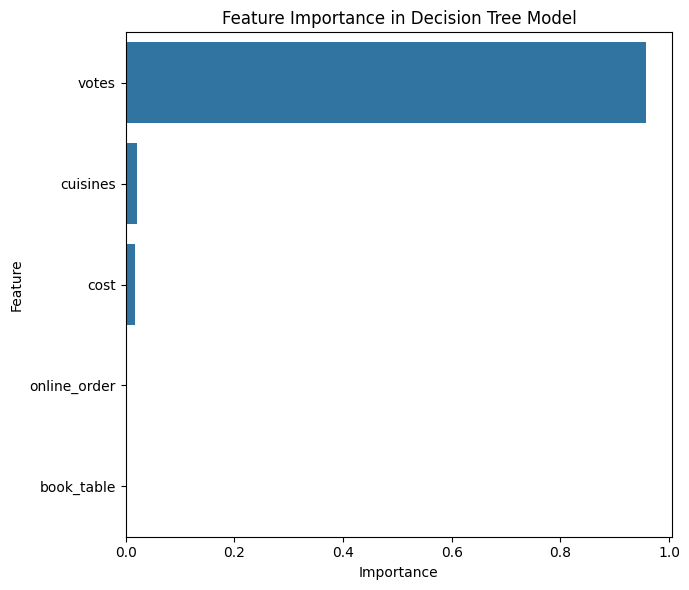

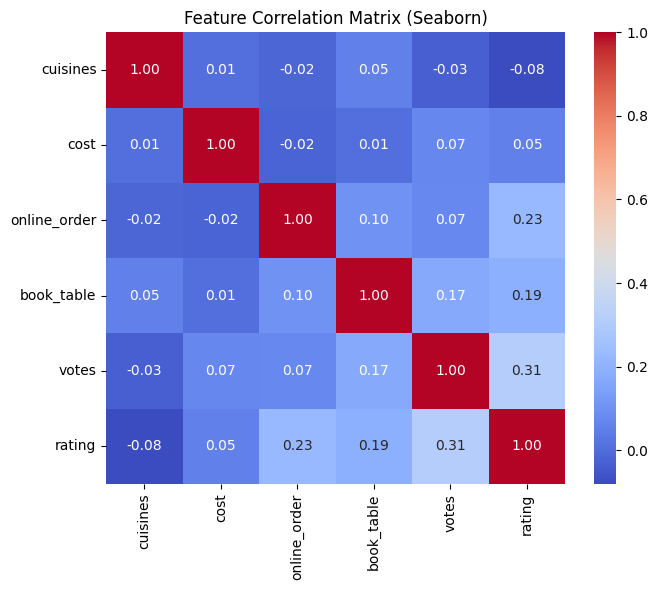

In [15]:
print("Prediction Summary:")
print("-------------------------")
print(f"R-squared Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

# Analyzing feature importances in the model
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeatures influencing the prediction the most:")
print("--------------------------------------------")
for row in feature_importances.itertuples():
    print(f"{row.Feature}: {row.Importance:.2f}")

print("\nThe model's results suggest that '", feature_importances.iloc[0]['Feature'],"' is the most influential feature affecting restaurant ratings.\n")


# Barplot to visually represent the importance of each feature
plt.figure(figsize=(7, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance in Decision Tree Model")
plt.tight_layout()
plt.show()

# Creating a correlation heatmap using seaborn for numerical features
df_numeric = df.select_dtypes(include=[np.number])

plt.figure(figsize=(7,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix (Seaborn)")
plt.tight_layout()
plt.show()
